In [38]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


 2. Load the dataset into the tool.

In [3]:
df=pd.read_csv('House Price India.csv')

In [4]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [5]:
df.shape
#finding shape

(14620, 23)

3. performining visualizaations.

(i.)  Univariate analysis.

<Axes: >

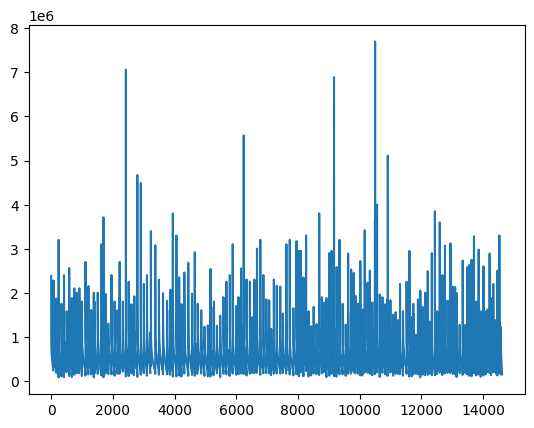

In [29]:
df.Price.plot()

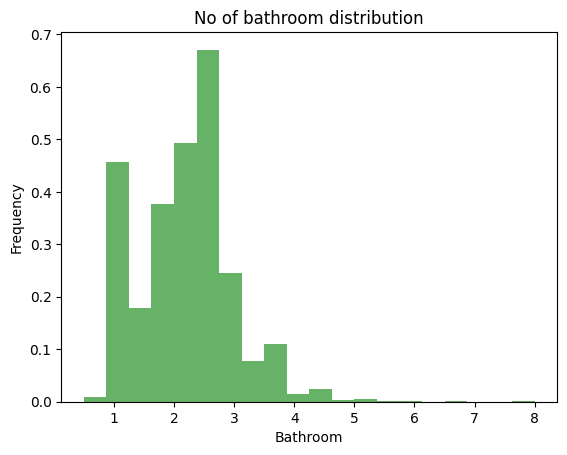

In [30]:
# plot histogram off Bathroom variable
plt.hist(df['number of bathrooms'], bins=20, density=True, alpha=0.6, color='g')
plt.title('No of bathroom distribution')
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

(ii.) Bi-Variate analysis;

In [31]:
#Corelation 
df.corr()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
id,1.000000,0.045966,-0.329034,-0.516909,-0.648127,-0.100269,-0.312305,-0.112937,-0.293004,-0.045061,...,-0.068645,-0.109155,0.294709,-0.479334,-0.070841,-0.599900,-0.089604,-0.004821,-0.004542,-0.773114
Date,0.045966,1.000000,-0.015663,-0.026485,-0.021958,0.004392,-0.010335,0.012006,-0.004782,-0.027402,...,-0.005869,-0.011636,0.018243,-0.023327,-0.018231,-0.032495,-0.000050,-0.004071,0.011457,-0.027919
number of bedrooms,-0.329034,-0.015663,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,-0.516909,-0.026485,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,-0.648127,-0.021958,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,-0.100269,0.004392,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,-0.312305,-0.010335,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.112937,0.012006,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,...,-0.024226,0.085865,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,-0.293004,-0.004782,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,...,-0.055357,0.102944,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,-0.045061,-0.027402,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,...,-0.381718,-0.062126,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376


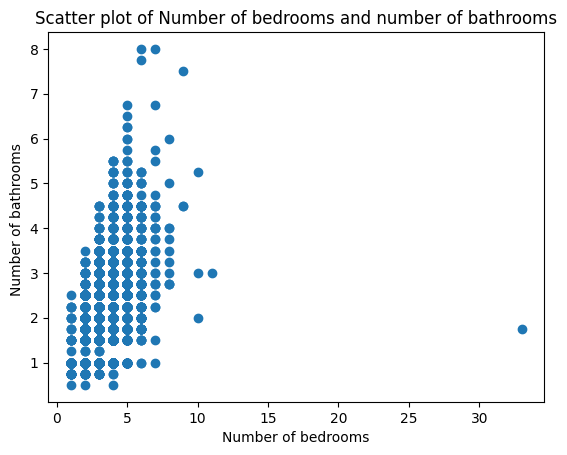

In [32]:
# Scatter plot for the Condition of house and  the price
x=df['number of bedrooms']
y=df['number of bathrooms']
plt.scatter(x,y)
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of bathrooms ')
plt.title('Scatter plot of Number of bedrooms and number of bathrooms')
plt.show()

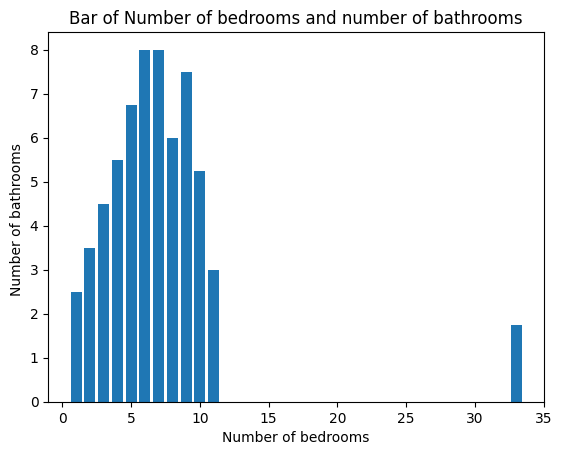

In [33]:
 # Bar for the Condition of house and  the price
x=df['number of bedrooms']
y=df['number of bathrooms']
plt.bar(x,y)
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of bathrooms ')
plt.title('Bar of Number of bedrooms and number of bathrooms')
plt.show()

(iii.) Multi variate analysis.

In [39]:

# Separate the features (independent variables) from the target variable (dependent variable)
X = df.drop('Price', axis=1)
y = df['Price']

# Create a factor analysis object with 3 components
fa = FactorAnalysis(n_components=3)

# Fit the factor analysis object to the data
X_fa = fa.fit_transform(X)

# Print the factor loadings for each feature
print(fa.components_)

# Print the variance explained by each component
#print(fa.explained_variance_)


[[-6.28489813e+02  2.89920492e-01  3.24297481e-02  6.26537596e-02
   1.63319667e+02  3.79112499e+04 -2.34111212e-03  2.32319886e-03
   6.03458327e-02 -5.65260286e-03  1.31104634e-01  1.54493175e+02
   8.82649206e+00  1.55128641e+00  2.86148804e+00  1.35251169e+00
  -1.26119209e-02  3.16790497e-02  1.05037599e+02  1.87703848e+04
  -1.07119234e-02  2.52791786e-02]
 [ 1.53058706e+02  3.05908358e-01 -6.10846209e-03 -2.22073694e-02
  -7.16921543e+01  7.32433389e+02  5.45082407e-03 -1.61665384e-03
  -1.71985541e-02 -1.32393030e-03 -6.15765425e-02 -7.35622787e+01
   1.87012449e+00 -1.48756066e+00 -5.50164477e-01 -7.26957887e-01
   5.06709771e-03 -1.96798743e-02 -7.94453733e+01 -1.80739353e+04
   1.83486745e-02  2.14170325e-01]
 [-4.22695213e+03 -1.95761301e+00  5.15558639e-01  6.05231468e-01
   8.60509642e+02 -1.33255451e-04  2.57428522e-01  8.39536216e-03
   1.98891970e-01 -8.25533159e-02  9.71462018e-01  7.38169400e+02
   1.22340242e+02  1.19169447e+01  1.74363365e+01 -2.70136058e+00
   1.3

4. Descriptive statistics

In [6]:
#Descriptive stats
df.describe(include='all')

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [40]:
# Define the independent and dependent variables
X = df[['number of bathrooms', 'number of bedrooms','living area','lot area' ,'Postal Code']]
Y = df['Price']

# Add a constant to the independent variables to include the intercept term in the regression
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     3258.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        12:20:39   Log-Likelihood:            -2.0262e+05
No. Observations:               14620   AIC:                         4.052e+05
Df Residuals:                   14614   BIC:                         4.053e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.282e+08   1

In [9]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

5.Missing values

In [7]:
df.isnull().sum()
#Finding for null valuues

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

****  Heere data is already clean , So we have to move another step   ****

In [8]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

6. Outliier and replace them Outliers

In [ ]:
#outliers


7. Encodinng 

In [11]:
# performing encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


Actually in this  data set all the data in the form of "NUMEERICAL" counterparts so no need to perform encoding here .

In [12]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


8. split data into independent and dependent.

In [13]:
# split data
x = df.drop('Price',axis=1)
y = df['Price']

9.  Scale independent  variable.

In [20]:

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the independent variables
x_scaled = scaler.fit_transform(x)

# The scaled independent variables are now stored in X_scaled
# The target variable is stored in y

# Print the scaled data (optional)
scaled_data = pd.DataFrame(x_scaled, columns=x.columns)
print(scaled_data.head())
print(y.head())


         id      Date  number of bedrooms  number of bathrooms  living area  \
0 -1.713148 -1.685908            1.726515             0.481119     1.671691   
1 -1.634590 -1.685908            0.661197             0.481119     0.885260   
2 -1.576392 -1.685908            1.726515             0.805833     0.874487   
3 -1.318751 -1.685908            0.661197             0.481119     1.305408   
4 -1.268409 -1.685908           -0.404121            -0.168309     0.659026   

   lot area  number of floors  waterfront present  number of views  \
0 -0.159376          0.921180           -0.087863         4.916126   
1 -0.292557         -0.004368           -0.087863        -0.304223   
2 -0.148036         -0.004368           -0.087863        -0.304223   
3  0.735916          0.921180           -0.087863        -0.304223   
4 -0.279371         -0.004368           -0.087863        -0.304223   

   condition of the house  ...  Area of the basement  Built Year  \
0                2.363238  ...      

10. Split data into training and testing.

In [21]:
#   split data for training and testing.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

11. Build thhe  model.

In [23]:
# Initializing DT
dt = DecisionTreeClassifier()

12. Traning the model.

In [24]:
# Training model
dt.fit(x_train,y_train)

DecisionTreeClassifier()

13. Test Model

In [25]:
 # Testing model
pred = dt.predict(x_test)
pred

array([650000, 635500, 322400, ..., 369950, 279200, 563000], dtype=int64)

14. Measure performance using metrics.

In [27]:
# Evaluating model performance
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

       78000       0.00      0.00      0.00         0
       82500       0.00      0.00      0.00         1
       86500       0.00      0.00      0.00         0
       90000       0.00      0.00      0.00         0
       96500       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00         3
      102500       0.00      0.00      0.00         0
      105000       0.00      0.00      0.00         0
      106000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      110700       0.00      0.00      0.00         1
      112000       0.00      0.00      0.00         1
      114000       0.00      0.00      0.00         0
      114975       0.00      0.00      0.00         0
      115000       0.00      0.00      0.00         0
      118000       0.00      0.00      0.00         0
      118125       0.00      0.00      0.00         1
      119900       0.00    

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

In [28]:
# Evaluating model performance
metrics.confusion_matrix(y_test,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Assignment 2 work successfully completed.
